In [ ]:
#Uncomment it during the first run and choose python 3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --config python3
!sudo apt install python3-pip

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.10   2         auto mode
  1            /usr/bin/python3.10   2         manual mode
  2            /usr/bin/python3.8    1         manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in manual mode
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-pip python3-setuptools python3-wheel
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,389 kB of archives.
After thi

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#!pip install -U numpy

Mounted at /content/drive


In [ ]:
!pip install fracdiff
!pip show fracdiff


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.7 MB/s 
     |████████████████████████████████| 17.3 MB 1.3 MB/s 
     |████████████████████████████████| 34.5 MB 40 kB/s 
     |████████████████████████████████| 12.3 MB 50.6 MB/s 
     |████████████████████████████████| 233 kB 55.9 MB/s 
     |████████████████████████████████| 48 kB 4.1 MB/s 
     |████████████████████████████████| 247 kB 58.3 MB/s 
     |████████████████████████████████| 341 kB 63.6 MB/s 
     |████████████████████████████████| 502 kB 57.4 MB/s 


Name: fracdiff
Version: 0.9.0
Summary: Super-fast fractional differentiation.
Home-page: https://github.com/fracdiff/fracdiff
Author: Shota Imaki
Author-email: shota.imaki.0801@gmail.com
License: BSD-3-Clause
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy, statsmodels, scipy
Required-by: 


In [ ]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages")

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import plotly.figure_factory as ff
import plotly as py
import plotly.graph_objs as go
from statsmodels.graphics.gofplots import qqplot
from fracdiff.sklearn import FracdiffStat
from fracdiff import fdiff
from statsmodels.tsa.stattools import kpss
import statsmodels.stats.api as sms
from statsmodels.stats.weightstats import ztest

%matplotlib inline


pio.renderers.default = 'colab'
pio.templates.default = 'plotly'

<font size = 4>AAPl - цена акции Apple.\
BTC - цена биткоина.\
GAS - цена фьючерсов на газ.</font>

<font size = 5>Обратите внимание, что данные не выровнены, календари торгов фьючерсов, биткойна и акций не совпадают, вам нужно будет их сначала смёржить перед тем как строить какие-то выводы.</font>

In [ ]:
aapl_df = pd.read_csv('/content/drive/My Drive/Colab Directory/hw4-perepelart-statistics/AAPL.csv')
btc_df = pd.read_csv('/content/drive/My Drive/Colab Directory/hw4-perepelart-statistics/BTC.csv')
gas_df = pd.read_csv('/content/drive/My Drive/Colab Directory/hw4-perepelart-statistics/GAS.csv')

In [ ]:
gas_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-23,2.522,2.547,2.493,2.527,2.527,114580
1,2019-09-24,2.535,2.590,2.494,2.503,2.503,56840
2,2019-09-25,2.497,2.519,2.455,2.502,2.502,60510
3,2019-09-26,2.514,2.540,2.390,2.428,2.428,242116
4,2019-09-27,2.449,2.451,2.380,2.404,2.404,132791
...,...,...,...,...,...,...,...
866,2023-02-27,2.650,2.740,2.554,2.731,2.731,238896
867,2023-02-28,2.723,2.788,2.568,2.747,2.747,160843
868,2023-03-01,2.769,2.839,2.664,2.811,2.811,157116
869,2023-03-02,2.811,2.863,2.710,2.765,2.765,134243


In [ ]:
aapl_df.rename(columns = {'date' : 'Date'}, inplace = True)

In [ ]:
btc_df.rename(columns = {'date' : 'Date'}, inplace = True)

In [ ]:
aapl_df['Date'] = aapl_df['Date'].apply(lambda x: pd.to_datetime(x))
btc_df['Date'] = btc_df['Date'].apply(lambda x: pd.to_datetime(x))
gas_df['Date'] = gas_df['Date'].apply(lambda x: pd.to_datetime(x))

In [ ]:
aapl_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0


In [ ]:
gas_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-23,2.522,2.547,2.493,2.527,2.527,114580
1,2019-09-24,2.535,2.590,2.494,2.503,2.503,56840
2,2019-09-25,2.497,2.519,2.455,2.502,2.502,60510
3,2019-09-26,2.514,2.540,2.390,2.428,2.428,242116
4,2019-09-27,2.449,2.451,2.380,2.404,2.404,132791
...,...,...,...,...,...,...,...
866,2023-02-27,2.650,2.740,2.554,2.731,2.731,238896
867,2023-02-28,2.723,2.788,2.568,2.747,2.747,160843
868,2023-03-01,2.769,2.839,2.664,2.811,2.811,157116
869,2023-03-02,2.811,2.863,2.710,2.765,2.765,134243


In [ ]:
btc_df

,Date,Open,High,Low,Close,Volume
0,2019-09-23,10028.05,10049.99,9615.77,9702.25,31937.232356
1,2019-09-24,9702.20,9794.99,7800.00,8493.14,94007.345203
2,2019-09-25,8497.55,8730.00,8215.64,8430.05,60783.892258
3,2019-09-26,8430.05,8465.99,7750.00,8063.73,67930.853749
4,2019-09-27,8063.49,8265.00,7852.15,8177.91,43882.924625
...,...,...,...,...,...,...
1254,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.998940
1255,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.417370
1256,2023-03-02,23629.76,23796.93,23195.90,23465.32,239315.452190
1257,2023-03-03,23465.32,23476.95,21971.13,22354.34,319954.197850


<font size = 5>Проверим на лог нормальность распределение выборки ```btc_df['Close']```.</font>

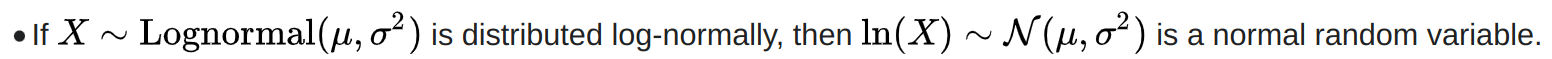

In [ ]:
x = btc_df['Close']
stat, p_value  = stats.kstest(np.log(x), "lognorm", stats.lognorm.fit(np.log(x)))
if p_value < 0.01:
    print('Distribution is not log normal.')

Distribution is not log normal.


In [ ]:
stat, p_value = stats.kstest(np.log(x), 'norm')
if p_value < 0.01:
    print('Distribution is not log normal.')

Distribution is not log normal.


<font size = 4>Проверяем, отсортированы ли даты.</font>

In [ ]:
gas_df['Date'].is_monotonic_increasing

True

In [ ]:
aapl_df['Date'].is_monotonic_increasing

True

In [ ]:
btc_df['Date'].is_monotonic_increasing

True

<font size = 5>The meaning of the feature 'Adj Close'.\
Adjusted closing price refers to the price of the stock after paying off the dividends. For instance, if a stock is priced at Rs. 100 and gives a dividend of INR5 per share, then its adjusted closing price would be Rs. 95.</font>

<font size = 5>Разбираемся, за что отвечает параметр ```trendline``` в ```px.scatter```.\
Description of the parameters which were used in ``` px.scatter ```.</font>

<font size = 5>With ```px.scatter```, each data point is represented as a marker point, whose location is given by the x and y columns.\
Plotly Express allows you to add Ordinary Least Squares regression trendline to scatterplots with the trendline argument. Hovering over the trendline will show the equation of the line and its R-squared value.\
https://en.wikipedia.org/wiki/Ordinary_least_squares
</font>

In [ ]:
fig = px.scatter(data_frame = aapl_df, x = 'Date', y = 'Adj Close', trendline = 'ols', title = 'AAPL')
fig.show()

In [ ]:
fig = px.scatter(data_frame = btc_df, x = 'Date', y = 'Close', trendline = 'ols', title = 'BTC')
fig.show()

In [ ]:
fig = px.scatter(data_frame = gas_df, x = 'Date', y = 'Close', trendline = 'ols', title = 'GAS(N.NG)')
fig.show()

In [ ]:
#1) на основе Close извлеките логарифмическую доходность BTC task1, ответ – мю и сигма

#2) проверьте распределение получившихся данных BTC task2, ответ yes/no 

#3) возмонжо попробуйте их (BTC) нормализовать task3, ответ – mu и sigma

#4) попробуйте предположить по подвыборке размером 634 дней среднее значение для доходностей (BTC) на уровне 90 95 99 – task 4, ответ – val + [a;b]

#5) проверьте корреляцию доходностей BTC & AAPL – task5, ответ – yes/no

#6) проверьте гипотезу о равенствен средних и дисперсии доходностей BTC & AAPL & GAS – task6, ответ – yes/no

In [ ]:
ANSWERS = {
    'tasks' : {
        'task1_mu' : {
            "answer" : 0
        }, 
        'task1_sigma' : {
            "answer" : 0
        }, 
        'task2_normal' : {
            'answer' : 'yes'
        }, 
        'task3_mu' : {
            "answer" : 0
        }, 
        'task3_sigma' : {
            "answer" : 0
        }, 
        'task4_90' : {
            "answer" : 0.1
        }, 
        'task4_90_int' : {
            "answer" : [0.01, 0.2]
        }, 
        'task4_95' : {
            "answer" : 0.1
        }, 
        'task4_95_int' : {
            "answer" : [0.01, 0.2]
        }, 
        'task4_99' : {
            "answer" : 0.1
        }, 
        'task4_99_int' : {
            "answer" : [0.01, 0.2]
        }, 
        'task5_corr' : {
            "answer" : "no"
        },
        'task6_corr_mu' : {
            "answer" : "no"
        },
        'task6_corr_sigma' : {
            "answer" : "no"
        }
    }
}


## 1. На основе Close извлеките логарифмическую доходность BTC task1, ответ – мю и сигма.

<font size = 5>```numpy.diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)[source]```\
Calculate the $n$-th discrete difference along the given axis.\
The first difference is given by ```out[i] = a[i+1] - a[i]``` along the given axis, higher differences are calculated by using diff recursively. </font>

<font size = 5>```DataFrame.shift(periods=1, freq=None, axis=0, fill_value=_NoDefault.no_default)[source]```    
Shift index by desired number of periods with an optional time freq.</font>

In [ ]:
#try to understand how to use np.diff
arr = np.array([1,2,3,4,5])
np.diff(arr)

array([1, 1, 1, 1])

In [ ]:
log_returns_btc = np.log(btc_df['Close']/btc_df['Close'].shift(1)).dropna()
log_returns_btc

1      -0.133099
2      -0.007456
3      -0.044426
4       0.014060
5       0.002552
          ...   
1254   -0.015033
1255    0.020843
1256   -0.006950
1257   -0.048503
1258   -0.000229
Name: Close, Length: 1258, dtype: float64

In [ ]:
#To check answer with other methods
log_return_bts_other_method1 = np.log(btc_df['Close']).diff()
log_return_bts_other_method2 = np.log(btc_df['Close']) - np.log(btc_df['Close'].shift(1))
np.all(log_return_bts_other_method2[1:]-log_returns_btc < 1e-10), np.all(log_return_bts_other_method1[1:]-log_returns_btc < 1e-10)

(True, True)

In [ ]:
mean_log_returns_btc = log_returns_btc.mean()
std_log_returns_btc = log_returns_btc.std()

In [ ]:
mean_log_returns_btc, std_log_returns_btc

(0.000663301751786781, 0.03868677674572917)

In [ ]:
ANSWERS['tasks']['task1_mu']['answer'] = mean_log_returns_btc
ANSWERS['tasks']['task1_sigma']['answer'] = std_log_returns_btc

In [ ]:
ANSWERS

{'tasks': {'task1_mu': {'answer': 0.000663301751786781},
  'task1_sigma': {'answer': 0.03868677674572917},
  'task2_normal': {'answer': 'yes'},
  'task3_mu': {'answer': 0},
  'task3_sigma': {'answer': 0},
  'task4_90': {'answer': 0.1},
  'task4_90_int': {'answer': [0.01, 0.2]},
  'task4_95': {'answer': 0.1},
  'task4_95_int': {'answer': [0.01, 0.2]},
  'task4_99': {'answer': 0.1},
  'task4_99_int': {'answer': [0.01, 0.2]},
  'task5_corr': {'answer': 'no'},
  'task6_corr_mu': {'answer': 'no'},
  'task6_corr_sigma': {'answer': 'no'}}}

In [ ]:
def calculate_log_returns(stocks : pd.Series):
    return np.log(stocks['Close']/stocks['Close'].shift(1)).dropna()

## 2. Проверьте распределение получившихся данных на нормальность BTC task2, ответ yes/no.

<font size = 5>Смотрим, как вообще примерно должно выглядеть нормальное распределение с параметрами, равными выборочным параметрам ```log_returns_btc```.
Затем смотрим на гистограмму ```log_returns_btc```.
</font>

In [ ]:
x_normal = np.random.normal(loc = mean_log_returns_btc, scale = std_log_returns_btc, size = 1284)
px.histogram(x_normal)

In [ ]:
px.histogram(log_returns_btc)

<font size =5>Пытаемся проверять ```log_returns_btc``` на нормальность.</font>

<font size = 5>
Далее я постоянно буду проверить выборки на нормальность разными статистическими тестами. При этом нулевая и альтернативная гипотезы будут одинаковыми. Чтобы не перегружать тетрадку, я выпишу эти гипотезы здесь. Я придерживаюсь описания тестов, приведённого в документации.
</font>

<font size = 5><b>Kolmogorov–Smirnov test</b> (```kolmogorov_smirnov_test``` and ```stats.kstest``` in my code below).
    
$H_0 :$  the two distributions are identical, $F(x)=G(x)$ for all $x$, there $G(x)$ in most cases will be the CDF of normal distribution and $F(x)$ is a CDF of my sample,\
$H_1 : $ they are not identical.</font>

<font size = 5><b>D’Agostino, R. and Pearson test</b> (```normal_test``` in my code below).

$H_0 :$  sample comes from a normal distribution,\
$H_1 : $ sample doesn't come from a normal distribution.</font>

<font size = 5><b>Anderson–Darling test</b> (```anderson_test``` in my code below).
    
$H_0 :$  a sample is drawn from a population that follows a particular distribution, below a particular distribution always will be the normal distribution,\
$H_1 : $ sample isn't being drawn from the normal distribution.</font>

<font size = 5><b>Shapiro-Wilk</b> (```shapiro_test``` and ```stats.shapiro``` in my code below).
    
$H_0 :$  a sample is drawn from a population that follows the normal distribution,\
$H_1 : $ sample isn't being drawn from the normal distribution.</font>

In [ ]:
k2, p = stats.kstest(log_returns_btc, 'norm')
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 2.16373e-234
The null hypothesis can be rejected


In [ ]:
stat, p = stats.shapiro(log_returns_btc)
print('Statistics=%.3f, p=%.29f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.882, p=0.00000000000000000000000000001
Sample does not look Gaussian (reject H0)


<font size = 5>Пара функций с красивым выводом результатов тестов. Я намеренно использую всегда несколько разных тестов, так как что документация ```scipy```, что документация ```statsmodels``` говорит о том что так надёжнее.</font>

In [ ]:
def shapiro_test(x : pd.Series):
    stat, p = stats.shapiro(x)

    # interpret
    alpha = 0.05
    if p > alpha:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'

    result_mat = [
        ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
        [len(x), stat, p, msg]
    ]

    swt_table = ff.create_table(result_mat)
    swt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
    swt_table['layout']['height']=200
    swt_table['layout']['margin']['t']=50
    swt_table['layout']['margin']['b']=50
    
    py.offline.iplot(swt_table, filename='shapiro-wilk-table')
    

def kolmogorov_smirnov_test(x : pd.Series):
    stat, p = stats.kstest(x, 'norm')

    # interpret
    alpha = 0.05
    if p > alpha:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'

    result_mat = [
        ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
        [len(x), stat, p, msg]
    ]

    swt_table = ff.create_table(result_mat)
    swt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
    swt_table['layout']['height']=200
    swt_table['layout']['margin']['t']=50
    swt_table['layout']['margin']['b']=50
    
    py.offline.iplot(swt_table, filename='shapiro-wilk-table')

In [ ]:
def anderson_test(x):
    result = stats.anderson(x)
    stat = round(result.statistic, 4)
    p = 0
    result_mat = []
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            msg = 'Sample looks Gaussian (fail to reject H0)'
        else:
            msg = 'Sample does not look Gaussian (reject H0)'
        result_mat.append([len(x), stat, sl, cv, msg])

    trace = go.Table(
        header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>Significance Level</b>', '<b>Critical Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
        cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff', '#EBF0F8']]),
               align = 'center',
               height = 40),
        columnwidth=[0.3, 0.25, 0.3, 0.25, 0.5])
    layout = dict(
    height=300,
    margin=dict(
        l=5,
        r=5,
        t=30,
        b=0
    )
)
    data = [trace]
    andar_table = dict(data=data, layout=layout)

    py.offline.iplot(andar_table, filename='anderson-darling-table')

In [ ]:
def normal_test(x): #D'Agostino's $K^{2}$Test
    stat, p = stats.normaltest(x)
    alpha = 0.05
    if p > alpha:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'

    result_mat = [
        ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
        [len(x), stat, p, msg]
    ]

    normt_table = ff.create_table(result_mat)
    normt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
    normt_table['layout']['height']=200
    normt_table['layout']['margin']['t']=50
    normt_table['layout']['margin']['b']=50

    py.offline.iplot(normt_table, filename="D'Agostino-test-table")

In [ ]:
anderson_test(log_returns_btc)

In [ ]:
shapiro_test(log_returns_btc)

In [ ]:
normal_test(log_returns_btc)

In [ ]:
kolmogorov_smirnov_test(log_returns_btc)

<font size = 5>Для большей надёжности и наглядности посмотрим и на Q-Q plot.</font>

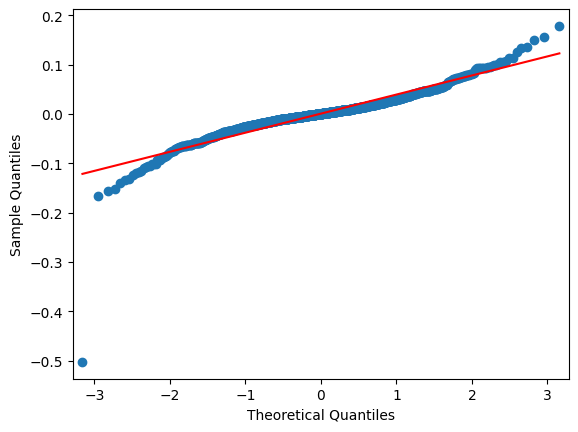

In [ ]:
qqplot_data = qqplot(log_returns_btc, line='s').gca().lines;

In [ ]:
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})


py.offline.iplot(fig, filename='normality-QQ');

<font size = 5>Всё говорит нам о том что распределение ```log_returns_btc``` не нормально.</font>

In [ ]:
ANSWERS['tasks']['task2_normal']['answer'] = 'no'

In [ ]:
ANSWERS

{'tasks': {'task1_mu': {'answer': 0.000663301751786781},
  'task1_sigma': {'answer': 0.03868677674572917},
  'task2_normal': {'answer': 'no'},
  'task3_mu': {'answer': 0},
  'task3_sigma': {'answer': 0},
  'task4_90': {'answer': 0.1},
  'task4_90_int': {'answer': [0.01, 0.2]},
  'task4_95': {'answer': 0.1},
  'task4_95_int': {'answer': [0.01, 0.2]},
  'task4_99': {'answer': 0.1},
  'task4_99_int': {'answer': [0.01, 0.2]},
  'task5_corr': {'answer': 'no'},
  'task6_corr_mu': {'answer': 'no'},
  'task6_corr_sigma': {'answer': 'no'}}}

## 3. Возможно, попробуйте нормализовать log_returns_btc, task3, ответ – mu и sigma.

<font size = 4>1. https://en.wikipedia.org/wiki/Normalization_(statistics)
    
2.https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)</font>

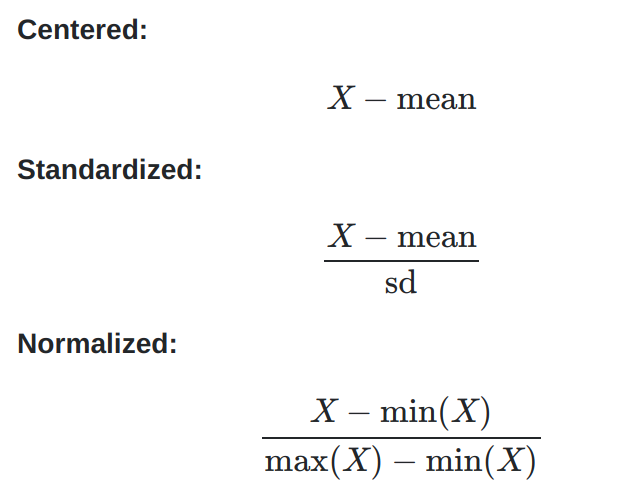

In [ ]:
log_returns_btc_normalized = (log_returns_btc - min(log_returns_btc))/(max(log_returns_btc)-min(log_returns_btc))
px.histogram(log_returns_btc_normalized)

In [ ]:
log_returns_btc_normalized_mean = log_returns_btc_normalized.mean()
log_returns_btc_normalized_std = log_returns_btc_normalized.std()
log_returns_btc_normalized_mean, log_returns_btc_normalized_std

(0.7389562857739927, 0.05680414680859473)

In [ ]:
log_returns_btc_standardized = (log_returns_btc - log_returns_btc.mean())/log_returns_btc.std()
log_returns_btc_standardized.mean(), log_returns_btc_standardized.std()

(0.0, 1.0)

In [ ]:
px.histogram(log_returns_btc_standardized)

In [ ]:
anderson_test(log_returns_btc_normalized)

In [ ]:
anderson_test(log_returns_btc_standardized)

In [ ]:
normal_test(log_returns_btc_normalized)

In [ ]:
normal_test(log_returns_btc_standardized)

In [ ]:
kolmogorov_smirnov_test(log_returns_btc_normalized)

In [ ]:
kolmogorov_smirnov_test(log_returns_btc_standardized)

<font size = 5>Видно, что с точки зрения "нормальности" полученных выборок, успеха мы не добились.
Для дробного дифференцирования взял [библиотеку](https://github.com/fracdiff/fracdiff), в которой написано, что она напрямую имплементирует описанный в книге Advances in Financial Machine Learning by M. Prado алгоритм.</font>

<font size = 5>Для начала я пробовал [автоматически подобрать](https://fracdiff.github.io/fracdiff/generated/fracdiff.sklearn.FracdiffStat.html) такой порядок дифференцирования, который сделает ряд стационарным, надеясь, что это поможет и в вопросе нормальности. Но как оказалось, тест [Kwiatkowski-Phillips-Schmidt-Shin](https://en.wikipedia.org/wiki/KPSS_test) сразу нам говорит о том что вероятнее, что ряд изначально стационарен. Именно поэтому ```FracdiffStat``` просто возваращет нам сам ряд, не дифференцируя его.</font>

In [ ]:
X = np.array(log_returns_btc)[..., np.newaxis]
f = FracdiffStat().fit(X)
X = f.transform(X)
np.all(X.flatten() == log_returns_btc)

True

In [ ]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(log_returns_btc)

Results of KPSS Test:
Test Statistic           0.275102
p-value                  0.100000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




<font size = 5>Пробовал разные порядки дробного дифференцирования, но результат неутешительный. Конкретный пример.</font>

In [ ]:
frac_diff_log_returns_btc = fdiff(log_returns_btc, 6)
px.histogram(frac_diff_log_returns_btc)

In [ ]:
kolmogorov_smirnov_test(frac_diff_log_returns_btc)

<font size=5>Но, к несчастью, все остальные тесты уверены в обратном.</font>

In [ ]:
shapiro_test(frac_diff_log_returns_btc)

In [ ]:
anderson_test(frac_diff_log_returns_btc)

In [ ]:
normal_test(frac_diff_log_returns_btc)

<font size = 5>Я нашёл такжу [работу](https://arxiv.org/pdf/1807.04119.pdf#:~:text=Time%20series%20are%20usually%20normalized,divide%20by%20the%20standard%20deviation.) где говорится, что иногда помогает следующее преобразование.</font>

In [ ]:
x = sp.stats.laplace.cdf(log_returns_btc)
px.histogram(x)

In [ ]:
kolmogorov_smirnov_test(x)

In [ ]:
normal_test(x)

In [ ]:
anderson_test(x)

<font size = 5>К сожалению, всё ещё далеко от нормального. Вообще говоря, по гистограмме полученное распределение очень напоминает [распределение Лапласа](https://en.wikipedia.org/wiki/Laplace_distribution).</font>

In [ ]:
stat, p = stats.kstest(frac_diff_log_returns_btc, stats.laplace.cdf)
if p > 0.05:
    print('Cannot reject the null hypothesis!')

Cannot reject the null hypothesis!


<font size = 5>Но толку от этого мало:</font>

In [ ]:
stat, p = stats.kstest(frac_diff_log_returns_btc, stats.norm.cdf)
if p > 0.05:
    print('Cannot reject the null hypothesis!')

Cannot reject the null hypothesis!


<font size = 5>Возникает идея убрать выбросы, так как эксперименты, которые я здесь не демонстрирую для экономии места, показывают, что они слишком сильно влияют на результат тестов.</font>

In [ ]:
def drop_outliers_using_IQR(x):
    Q1 = np.quantile(x, 0.25)
    Q3 = np.quantile(x, 0.75)
    IQR = Q3 - Q1
    return x[(x  > (Q1 - 1.5 * IQR)) & (x < (Q3 + 1.5 * IQR))]

In [ ]:
def standardize(x):
    return (x - x.mean())/x.std()

In [ ]:
x = drop_outliers_using_IQR(log_returns_btc)
x = standardize(x)
x = fdiff(x, 0.2353)
px.histogram(x)

In [ ]:
kolmogorov_smirnov_test(x)

In [ ]:
normal_test(x)

In [ ]:
anderson_test(x)

<font size = 5>Видно, что большая часть тестов наконец-то говорит нам о нормальности.</font>

In [ ]:
log_returns_btc_normal = x
ANSWERS['tasks']['task3_mu']['answer'] = log_returns_btc_normal.mean()
ANSWERS['tasks']['task3_sigma']['answer'] = log_returns_btc_normal.std()
ANSWERS

{'tasks': {'task1_mu': {'answer': 0.000663301751786781},
  'task1_sigma': {'answer': 0.03868677674572917},
  'task2_normal': {'answer': 'no'},
  'task3_mu': {'answer': -0.00046133298094555466},
  'task3_sigma': {'answer': 1.0461995650649922},
  'task4_90': {'answer': 0.1},
  'task4_90_int': {'answer': [0.01, 0.2]},
  'task4_95': {'answer': 0.1},
  'task4_95_int': {'answer': [0.01, 0.2]},
  'task4_99': {'answer': 0.1},
  'task4_99_int': {'answer': [0.01, 0.2]},
  'task5_corr': {'answer': 'no'},
  'task6_corr_mu': {'answer': 'no'},
  'task6_corr_sigma': {'answer': 'no'}}}

<font size = 5>Ещё раз кратко опишу как я нормализовал данные (лог доходности BTC): откинул выбросы, стандартизировал данные, применил дробное дифференцирование порядка $0.2353$.</font>

## 4. Попробуйте предположить по подвыборке размером 634 дней среднее значение для доходностей (BTC) на уровне доверия 0.90 0.95 0.99 – task 4, ответ – val + [a;b].

<font size = 5>То есть требуется найти доверительный интервал (ДИ) по всей выборке ```log_returns_btc_normal``` на разных уровнях доверия, а затем проверить, попадает ли в эти интервалы выборочное среднее по подвыборке.</font>

In [ ]:
np.random.seed(42)
log_returns_btc_sample = np.random.choice(log_returns_btc_normal, size = 634)

In [ ]:
kolmogorov_smirnov_test(log_returns_btc_sample)

In [ ]:
normal_test(log_returns_btc_sample)

<font size = 5>Так как доверительный интервал мы будем искать с помощью [```statsmodels.stats.weightstats.DescrStatsW.tconfint_mean```](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.conf_int.html#statsmodels.regression.linear_model.RegressionResults.conf_int), [```stats.norm.interval```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) и в том числе руками, нам важна нормальность выборки, иначе ни один из этих методов не сработает. На всякий случай, я проверяю также и нормальность полученной подвыборки.</font>

<font size = 5>Отметим, что результат ```statsmodels.stats.weightstats.DescrStatsW.tconfint_mean``` и ```stats.norm.interval``` отличается, т.к. первый метод находит доверительный интервал не для среднего, а для [взвешенного среднего](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean), то есть не совсем то что нам нужно.</font>

In [ ]:
sms.DescrStatsW(log_returns_btc_normal).tconfint_mean(0.05)

(-0.06059962584653986, 0.059676959884648724)

<font size = 5>Для начала на основе всей выборки находим доверительные интервалы.</font>

In [ ]:
mean = log_returns_btc_normal.mean()
std = log_returns_btc_normal.std()
sqrt_n = len(log_returns_btc_normal)**0.5

In [ ]:
stats.norm.interval(0.90, loc = mean, scale = std/sqrt_n)

(-0.0508569209744749, 0.04993425501258377)

In [ ]:
stats.norm.interval(0.95, loc = mean, scale = std/sqrt_n)

(-0.06051137988396445, 0.059588713922073336)

In [ ]:
stats.norm.interval(0.99, loc = mean, scale = std/sqrt_n)

(-0.0793804721653222, 0.07845780620343108)

<font size = 5>Найдем ДИ также и руками, по формуле.</font>

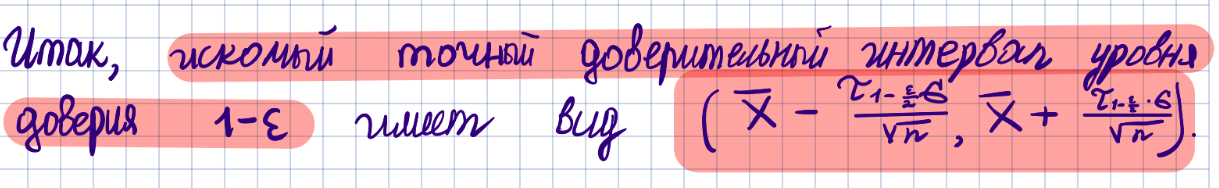

In [ ]:
def z_score(confidence):
    epsilon = 1 - confidence
    return stats.norm.ppf(1 - epsilon/2) 

<font size = 5>Доверительный интервал для среднего на уровне доверия $0.9$.</font>

In [ ]:
mean_ci_0_9 = mean - z_score(0.9)*std/sqrt_n, mean + z_score(0.9)*std/sqrt_n
mean_ci_0_9

(-0.05085692097447488, 0.04993425501258377)

<font size = 5>Доверительный интервал для среднего на уровне доверия $0.95$.</font>

In [ ]:
mean_ci_0_95 = mean - z_score(0.95)*std/sqrt_n, mean + z_score(0.95)*std/sqrt_n
mean_ci_0_95

(-0.06051137988396444, 0.05958871392207333)

<font size = 5>Доверительный интервал для среднего на уровне доверия $0.99$.</font>

In [ ]:
mean_ci_0_99 = mean - z_score(0.99)*std/sqrt_n, mean + z_score(0.99)*std/sqrt_n
mean_ci_0_99

(-0.0793804721653222, 0.07845780620343108)

<font size = 5>Ищем среднее по подвыборке.</font>

In [ ]:
mean_of_subsample = log_returns_btc_sample.mean()
mean_of_subsample

0.019531465733512447

<font size = 5>На лекции было сказано, что обычно (в случае работы с такими рода активами) среднее по выборке доходностей всегда равно $0$. Посмотрим статистическим тестом, так ли это для нашей выборки.</font>

<font size = 5>Проведём T-тест среднего для нашей выборки, так как нам неизвестно стандартное отклонение, а известно только выборочное стандартное отклонение.

<b>T-test</b>.\
$H_0:  \mu = 0$,\
$H_1 : \mu \ne 0$.</font>

In [ ]:
stat, p = stats.ttest_1samp(log_returns_btc_normal, popmean = 0, alternative = 'two-sided')
if p > 0.05:
    print(f'The null hypothesis cannot be rejected p is equal {p}')

The null hypothesis cannot be rejected p is equal 0.9879941369290217


<font size = 5>В тоже время, T-тест советуют использовать для выборок размера меньше $30$, иначе результат в любом случае будет очень близок к результату Z-теста. Также, насколько я понимаю, даже при неизвестном стандартном отклонении, при достаточно большой выборке, оно хорошо приближается выборочным стандартным отклонением, поэтому мы в праве использовать Z-тест, так как в выборке у нас достаточно много элементов.\
<b>Z-test</b>.\
$H_0:  \mu = 0$,\
$H_1 : \mu \ne 0$.</font>

In [ ]:
stat, p = ztest(log_returns_btc_normal, value = 0, alternative = 'two-sided')
if p > 0.05:
    print(f'The null hypothesis cannot be rejected, p is equal {p}')

The null hypothesis cannot be rejected, p is equal 0.9879915598982904


Проверим это и для подвыборки размера $634$.

In [ ]:
stat, p = stats.ttest_1samp(log_returns_btc_sample, popmean = 0, alternative = 'two-sided')
if p > 0.05:
    print(f'The null hypothesis cannot be rejected p is equal {p}')

The null hypothesis cannot be rejected p is equal 0.6423509561936023


In [ ]:
stat, p = ztest(log_returns_btc_sample, value = 0, alternative = 'two-sided')
if p > 0.05:
    print(f'The null hypothesis cannot be rejected, p is equal {p}')

The null hypothesis cannot be rejected, p is equal 0.6421911838832177


In [ ]:
ANSWERS['tasks']['task4_90']['answer'] = mean_of_subsample
ANSWERS['tasks']['task4_90_int']['answer'] = mean_ci_0_9

ANSWERS['tasks']['task4_95']['answer'] = mean_of_subsample
ANSWERS['tasks']['task4_95_int']['answer'] = mean_ci_0_95

ANSWERS['tasks']['task4_99']['answer'] = mean_of_subsample
ANSWERS['tasks']['task4_99_int']['answer'] = mean_ci_0_99

ANSWERS

{'tasks': {'task1_mu': {'answer': 0.000663301751786781},
  'task1_sigma': {'answer': 0.03868677674572917},
  'task2_normal': {'answer': 'no'},
  'task3_mu': {'answer': -0.00046133298094555466},
  'task3_sigma': {'answer': 1.0461995650649922},
  'task4_90': {'answer': 0.019531465733512447},
  'task4_90_int': {'answer': (-0.05085692097447488, 0.04993425501258377)},
  'task4_95': {'answer': 0.019531465733512447},
  'task4_95_int': {'answer': (-0.06051137988396444, 0.05958871392207333)},
  'task4_99': {'answer': 0.019531465733512447},
  'task4_99_int': {'answer': (-0.0793804721653222, 0.07845780620343108)},
  'task5_corr': {'answer': 'no'},
  'task6_corr_mu': {'answer': 'no'},
  'task6_corr_sigma': {'answer': 'no'}}}

<font size = 5>Для интереса, проверим, какой доверительный интервал получается с помощью бутстрэпа для разных уровней доверия.</font>

In [ ]:
stats.bootstrap((log_returns_btc_normal,), np.mean, confidence_level=0.90).confidence_interval

ConfidenceInterval(low=-0.05102264564579671, high=0.05031674818672813)

In [ ]:
stats.bootstrap((log_returns_btc_normal,), np.mean, confidence_level=0.95).confidence_interval

ConfidenceInterval(low=-0.06035678057000632, high=0.058985829125519286)

In [ ]:
stats.bootstrap((log_returns_btc_normal,), np.mean, confidence_level=0.99).confidence_interval

ConfidenceInterval(low=-0.07719499301657924, high=0.08133880550868176)

<font size = 5>Интересно, что результаты довольно хорошо согласуются с тем что получили мы.</font>

## 5. Проверьте корреляцию доходностей BTC & AAPL – task5, ответ – yes/no

<font size = 5>Для проверки коррелированости, я буду использовать не нормированные данные, т.к. документация [```scipy.stats.spearmanr```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) говорит нам о том что выборки не обязательно должны быть распределены нормально для проверки корреляции.\
Также я воспользуюсь методом [```scipy.stats.kendalltau```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html), в котором тоже не обязательно предполагать нормальное распределение у данных.\
[Spearman's rank correlation coefficient.](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)\
[Kendall rank correlation coefficient.](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)
</font>

In [ ]:
data_aapl_btc = pd.merge(aapl_df, btc_df, on = 'Date', how = 'inner', suffixes = ('_AAPL','_BTC'))

In [ ]:
data_aapl_btc['Date'].nunique() == len(data_aapl_btc['Date'])

True

In [ ]:
data_aapl_btc['Date'].is_monotonic

<ipython-input-100-b87775d2d73c>:1: FutureWarning:

is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.



True

In [ ]:
data_aapl_btc

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close,Volume_AAPL,Dividends,Stock Splits,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0,10028.05,10049.99,9615.77,9702.25,31937.232356
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0,9702.20,9794.99,7800.00,8493.14,94007.345203
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0,8497.55,8730.00,8215.64,8430.05,60783.892258
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0,8430.05,8465.99,7750.00,8063.73,67930.853749
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0,8063.49,8265.00,7852.15,8177.91,43882.924625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0,23554.85,23897.99,23106.77,23492.09,283706.085900
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0,23492.09,23600.00,23020.97,23141.57,264140.998940
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0,23141.57,24000.00,23020.03,23628.97,315287.417370
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0,23629.76,23796.93,23195.90,23465.32,239315.452190


In [ ]:
def calculate_log_returns_for_array(stocks : pd.Series):
    return np.log(stocks/stocks.shift(1)).dropna()

In [ ]:
apple_log_return = calculate_log_returns_for_array(data_aapl_btc['Close_AAPL'])
btc_log_return = calculate_log_returns_for_array(data_aapl_btc['Close_BTC'])

<font size = 5>
Небольшое описание того, как следует интерпертировать коэффициент корреляции Спирмена, который мы получим ниже.
    
Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.</font>

In [ ]:
stat, p = stats.spearmanr(btc_log_return, apple_log_return)
stat, p

(0.27673247207112833, 1.0481286857082598e-16)

<font size = 5>Небольшое описание коэффициента корреляции Кенделла.
    
Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement. This implements two variants of Kendall’s tau: tau-b (the default) and tau-c (also known as Stuart’s tau-c). These differ only in how they are normalized to lie within the range -1 to 1; the hypothesis tests (their p-values) are identical. Kendall’s original tau-a is not implemented separately because both tau-b and tau-c reduce to tau-a in the absence of ties.
</font>

In [ ]:
stat, p = stats.kendalltau(btc_log_return, apple_log_return)
stat, p

(0.18785303021642324, 1.2293386808011892e-16)

<font size = 5>Можно сделать вывод, что нельзя предполагать корреляцию лог доходностей BTC и AAPL.</font>

In [ ]:
ANSWERS['tasks']['task5_corr'] = 'no'
ANSWERS

{'tasks': {'task1_mu': {'answer': 0.000663301751786781},
  'task1_sigma': {'answer': 0.03868677674572917},
  'task2_normal': {'answer': 'no'},
  'task3_mu': {'answer': -0.00046133298094555466},
  'task3_sigma': {'answer': 1.0461995650649922},
  'task4_90': {'answer': 0.019531465733512447},
  'task4_90_int': {'answer': (-0.05085692097447488, 0.04993425501258377)},
  'task4_95': {'answer': 0.019531465733512447},
  'task4_95_int': {'answer': (-0.06051137988396444, 0.05958871392207333)},
  'task4_99': {'answer': 0.019531465733512447},
  'task4_99_int': {'answer': (-0.0793804721653222, 0.07845780620343108)},
  'task5_corr': 'no',
  'task6_corr_mu': {'answer': 'no'},
  'task6_corr_sigma': {'answer': 'no'}}}

## 6. Проверьте гипотезу о равенствен средних и дисперсии доходностей BTC & AAPL & GAS – task6, ответ – yes/no

In [ ]:
data_aapl_btc_gas = pd.merge(data_aapl_btc, gas_df, on = 'Date', how = 'inner')

In [ ]:
data_aapl_btc_gas['Date'].is_monotonic

<ipython-input-108-6170cec8945d>:1: FutureWarning:

is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.



True

In [ ]:
data_aapl_btc_gas

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_x,Volume_AAPL,Dividends,Stock Splits,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Open,High,Low,Close,Adj Close_y,Volume
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0,10028.05,10049.99,9615.77,9702.25,31937.232356,2.522,2.547,2.493,2.527,2.527,114580
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0,9702.20,9794.99,7800.00,8493.14,94007.345203,2.535,2.590,2.494,2.503,2.503,56840
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0,8497.55,8730.00,8215.64,8430.05,60783.892258,2.497,2.519,2.455,2.502,2.502,60510
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0,8430.05,8465.99,7750.00,8063.73,67930.853749,2.514,2.540,2.390,2.428,2.428,242116
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0,8063.49,8265.00,7852.15,8177.91,43882.924625,2.449,2.451,2.380,2.404,2.404,132791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0,23554.85,23897.99,23106.77,23492.09,283706.085900,2.650,2.740,2.554,2.731,2.731,238896
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0,23492.09,23600.00,23020.97,23141.57,264140.998940,2.723,2.788,2.568,2.747,2.747,160843
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0,23141.57,24000.00,23020.03,23628.97,315287.417370,2.769,2.839,2.664,2.811,2.811,157116
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0,23629.76,23796.93,23195.90,23465.32,239315.452190,2.811,2.863,2.710,2.765,2.765,134243


In [ ]:
apple_log_return = calculate_log_returns_for_array(data_aapl_btc_gas['Close_AAPL'])
btc_log_return = calculate_log_returns_for_array(data_aapl_btc_gas['Close_BTC'])
gas_log_return = calculate_log_returns_for_array(data_aapl_btc_gas['Close'])

<font size = 5>Для проведения требуемых статистических тестов нам необоходимо также нормализовать даные.\
Для краткости, будем обозначать далее логарифмические доходности AAPL как $x$, BTC как $y$, GAS как $z$.\
Для нормализации я сразу буду использовать тяжёлую артиллерию, так как знаю, что с нормализацией $y$ могут быть проблемы, а насколько я знаю, все данные желательно нормализовать единообразно.</font>.

In [ ]:
def hard_normalize(arr):
    res = drop_outliers_using_IQR(arr)
    res = standardize(res)
    return fdiff(res, 0.2353)

In [ ]:
x = hard_normalize(apple_log_return)
px.histogram(x)

In [ ]:
kolmogorov_smirnov_test(x)

In [ ]:
normal_test(x)

In [ ]:
y = hard_normalize(btc_log_return)
kolmogorov_smirnov_test(y)

In [ ]:
normal_test(y)

In [ ]:
z = hard_normalize(gas_log_return)
kolmogorov_smirnov_test(z)

In [ ]:
normal_test(z)

In [ ]:
shapiro_test(x)

In [ ]:
shapiro_test(y)

In [ ]:
shapiro_test(z)

<font size = 5> Проверяем, удовлетворены ли остальные требования к применению [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html):\
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.\
1.The samples are independent.\
2.Each sample is from a normally distributed population.\
3.The population standard deviations of the groups are all equal. This property is known as homoscedasticity.\
Вследствие пункта 3 возникает идея сначала проверить на совпадение дисперсии.\
Для этого посмотрим на результат [Levene's test](https://en.wikipedia.org/wiki/Levene%27s_test#:~:text=In%20statistics%2C%20Levene's%20test%20is,Levene's%20test%20assesses%20this%20assumption.).</font>

<font size = 5>
<b>Levene's test.</b>
    
$H_0 :$  all $3$ population variances are equal\
$H_1 : $ at least two population variances are different.</font>

In [ ]:
stat, p = stats.levene(x, y, z)
if p > 0.05:
    print(f'Null hypothesis cannot be rejected, p is {p}!')

Null hypothesis cannot be rejected, p is 0.9771822789082029!


<font size = 5>Так как выборки у нас нормальны, попробуем еще [scipy.stats.bartlett](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html) тест, который лучше работает для данных без сильных выбросов.</font>

<font size = 5>
<b>Bartlett's test.</b>
    
$H_0 :$  all $3$ population variances are equal\
$H_1 : $ at least two population variances are different.</font>

In [ ]:
stat, p = stats.bartlett(x, y, z)
if p > 0.05:
    print(f'Null hypothesis cannot be rejected, p is {p}!')

Null hypothesis cannot be rejected, p is 0.9804782378499468!


<font size = 5>В [статье](https://pubmed.ncbi.nlm.nih.gov/15171807/) говорится, что далеко не всегда проверка равенства дисперсий перед проверкой равенства средних имеет статистическую значимость. Поэтому я пытаюсь делать sanity-check : выборки у нас большие, а значит выборочные стандартные отклонения неплохо приближают стандартные отклонения.</font>

In [ ]:
x.std(), y.std(), z.std()

(1.0401410403452127, 1.0415063595712355, 1.0469481802893876)

<font size = 5>Взял [следующую реализацию](https://www.itl.nist.gov/div898/handbook/eda/section3/eda358.htm) теста проверки конкретной выборки на равенство её дисперсии конкретному значению.<size>

In [ ]:
def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    n = len(x)
    Q = (n - 1) * np.var(x) / va0 
    if direction == "lower":
        q = stats.chi2.ppf(alpha, n - 1)
        if Q <= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    elif direction == "upper":
        q = stats.chi2.ppf(1 - alpha, n - 1)
        if Q >= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    else:
        q1 = stats.chi2.ppf(alpha / 2, n - 1)
        q2 = stats.chi2.ppf(1 - (alpha / 2), n - 1)
        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
print(var_test(x, 1), var_test(y, 1), var_test(z, 1), sep = '\n')

H_0 not rejected
H_0 not rejected
H_0 not rejected


<font size = 5>Теперь можно проводить ANOVA тест.</font>

<font size = 5>
<b>ANOVA test.</b>
    
$H_0 :$  all $3$ population means are equal\
$H_1 : $ at least two population means are different.</font>

In [ ]:
stat, p = stats.f_oneway(x, y, z)
if p > 0.05:
    print(f'We cannot reject null hypothesis, p is {p}')

We cannot reject null hypothesis, p is 0.9984109635571539


<font size = 5>То есть статистические тесты показывают, что средние и дисперсии $x, y, z$ равны.</font>

In [ ]:
ANSWERS['tasks']['task6_corr_mu'] = ANSWERS['tasks']                                                                                                              ['task6_corr_sigma'] = 'yes'
ANSWERS

{'tasks': {'task1_mu': {'answer': 0.000663301751786781},
  'task1_sigma': {'answer': 0.03868677674572917},
  'task2_normal': {'answer': 'no'},
  'task3_mu': {'answer': -0.00046133298094555466},
  'task3_sigma': {'answer': 1.0461995650649922},
  'task4_90': {'answer': 0.019531465733512447},
  'task4_90_int': {'answer': (-0.05085692097447488, 0.04993425501258377)},
  'task4_95': {'answer': 0.019531465733512447},
  'task4_95_int': {'answer': (-0.06051137988396444, 0.05958871392207333)},
  'task4_99': {'answer': 0.019531465733512447},
  'task4_99_int': {'answer': (-0.0793804721653222, 0.07845780620343108)},
  'task5_corr': 'no',
  'task6_corr_mu': 'yes',
  'task6_corr_sigma': 'yes'}}

In [ ]:
import yaml
yaml_result = yaml.dump(ANSWERS)

print(yaml_result)

with open(f"hw03.yaml", "w") as f:
    f.write(yaml_result)

tasks:
  task1_mu:
    answer: !!python/object/apply:numpy.core.multiarray.scalar
    - &id001 !!python/object/apply:numpy.dtype
      args:
      - f8
      - false
      - true
      state: !!python/tuple
      - 3
      - <
      - null
      - null
      - null
      - -1
      - -1
      - 0
    - !!binary |
      Jyloqi28RT8=
  task1_sigma:
    answer: !!python/object/apply:numpy.core.multiarray.scalar
    - *id001
    - !!binary |
      7zTS0cDOoz8=
  task2_normal:
    answer: 'no'
  task3_mu:
    answer: !!python/object/apply:numpy.core.multiarray.scalar
    - *id001
    - !!binary |
      7IHTEOI7Pr8=
  task3_sigma:
    answer: !!python/object/apply:numpy.core.multiarray.scalar
    - *id001
    - !!binary |
      crJQwTu98D8=
  task4_90:
    answer: !!python/object/apply:numpy.core.multiarray.scalar
    - *id001
    - !!binary |
      kQVGeg4AlD8=
  task4_90_int:
    answer: !!python/tuple
    - !!python/object/apply:numpy.core.multiarray.scalar
      - *id001
      - !!binary